In [ ]:
import pandas as pd
import numpy as np
import os
import sys

In [ ]:
df_reader = pd.read_csv('/content/drive/MyDrive/TA/Labeled2_Dataset.csv',
                        header=0, iterator=True
                        )

In [ ]:
df_reader

In [ ]:
for df in df_reader:
  display(df.head())
  break

,Unnamed: 0,Unnamed: 0.1,msisdn,imsi,tc_day1,tc_day2,tc_day3,tc_day4,tc_day5,tc_day6,tc_day7,tc_day8,tc_day9,tc_day10,tc_day11,tc_day12,tc_day13,tc_day14,tc_day15,tc_day16,tc_day17,tc_day18,tc_day19,tc_day20,tc_day21,tc_day22,tc_day23,tc_day24,tc_day25,tc_day26,tc_day27,tc_day28,tc_day29,tc_day30,tc_day31,R,F,M,r_bin,f_bin,m_bin,Score,Label
0,0,0,6281318059XXX,510101832059XXX,202.0,2164303.0,655416009.0,87372757.0,3693817.0,549175.0,4569040.0,0.0,100205.0,20237932.0,671054826.0,190170885.0,337209319.0,41022.0,0.0,0.0,1933817.0,2126286.0,692363.0,0.0,0.0,47646.0,195248.0,0.0,617189193.0,617709644.0,0.0,110365.0,2162111.0,4558875.0,1075032.0,31,21,402547.509000,10.0,7.0,4.0,21.0,Loyal
1,1,1,X2812X10X80XX,51010X1250X80XX,137416.0,22077904.0,20629901.0,311107687.0,663527.0,54661.0,182843.0,232930328.0,176509439.0,2889908.0,20629901.0,4867743.0,6858907.0,3668256.0,0.0,232930328.0,11198.0,129300.0,3045.0,0.0,0.0,0.0,133315.0,1080571.0,72321658.0,72321658.0,42271.0,85361567.0,129305.0,33728.0,3906377.0,31,22,158951.592750,10.0,7.0,2.0,19.0,Loyal
2,2,2,628119229XX,X1010921321X0XX,2940787.0,3890527.0,433555.0,357325243.0,274591.0,386265.0,147004.0,0.0,652680.0,153596098.0,438491.0,2138986.0,577042.0,82424.0,18985.0,3386563.0,275070776.0,58.0,57216.0,18985.0,16729.0,0.0,0.0,6965.0,726771.0,726951.0,106008.0,1818075.0,3177.0,5399892.0,0.0,30,20,101280.105500,10.0,6.0,1.0,17.0,Loyal
3,3,3,628XX8XX678XX,5X0X08XX2X678XX,388641.0,51652.0,1178503.0,336427.0,24565.0,0.0,0.0,13529086.0,33765303.0,280829.0,1213122.0,17624076.0,0.0,67244203.0,11430200.0,13537135.0,0.0,0.0,0.0,21909917.0,2401422.0,1.0,0.0,194736.0,0.0,0.0,1702791.0,0.0,4725.0,92442672.0,31973.0,30,16,34911.497375,10.0,5.0,1.0,16.0,Loyal
4,4,4,6XXX1X35737XX,51010X36X5737XX,18034090.0,2024309.0,4552376.0,0.0,1297278.0,66825.0,291498.0,2826158.0,41451173.0,74941.0,4552377.0,9987.0,345527751.0,2567036.0,3519.0,943354.0,28757603.0,0.0,0.0,3519.0,451766.0,1947912.0,3398.0,0.0,134282.0,134583.0,0.0,380243.0,0.0,620128.0,2836020.0,31,19,57436.515750,10.0,6.0,1.0,17.0,Loyal


In [ ]:
for col in df.columns: #Count NaN Value Per Columns
  print("kolom : {} memiliki NaN value sebanyak \
  {} dari {} row".format(col, 
                         str(df[col].isna().sum()), 
                         str(len(df.index))))

kolom : Unnamed: 0 memiliki NaN value sebanyak   0 dari 963688 row
kolom : Unnamed: 0.1 memiliki NaN value sebanyak   0 dari 963688 row
kolom : msisdn memiliki NaN value sebanyak   0 dari 963688 row
kolom : imsi memiliki NaN value sebanyak   0 dari 963688 row
kolom : tc_day1 memiliki NaN value sebanyak   0 dari 963688 row
kolom : tc_day2 memiliki NaN value sebanyak   0 dari 963688 row
kolom : tc_day3 memiliki NaN value sebanyak   0 dari 963688 row
kolom : tc_day4 memiliki NaN value sebanyak   0 dari 963688 row
kolom : tc_day5 memiliki NaN value sebanyak   0 dari 963688 row
kolom : tc_day6 memiliki NaN value sebanyak   0 dari 963688 row
kolom : tc_day7 memiliki NaN value sebanyak   0 dari 963688 row
kolom : tc_day8 memiliki NaN value sebanyak   0 dari 963688 row
kolom : tc_day9 memiliki NaN value sebanyak   0 dari 963688 row
kolom : tc_day10 memiliki NaN value sebanyak   0 dari 963688 row
kolom : tc_day11 memiliki NaN value sebanyak   0 dari 963688 row
kolom : tc_day12 memiliki NaN valu

In [ ]:
data = df.dropna() # Drop Nan Value

In [ ]:
for col in data.columns:
  print("kolom : {} memiliki NaN value sebanyak \
  {} dari {} row".format(col, 
                         str(data[col].isna().sum()), 
                         str(len(data.index))))

kolom : Unnamed: 0 memiliki NaN value sebanyak   0 dari 963680 row
kolom : Unnamed: 0.1 memiliki NaN value sebanyak   0 dari 963680 row
kolom : msisdn memiliki NaN value sebanyak   0 dari 963680 row
kolom : imsi memiliki NaN value sebanyak   0 dari 963680 row
kolom : tc_day1 memiliki NaN value sebanyak   0 dari 963680 row
kolom : tc_day2 memiliki NaN value sebanyak   0 dari 963680 row
kolom : tc_day3 memiliki NaN value sebanyak   0 dari 963680 row
kolom : tc_day4 memiliki NaN value sebanyak   0 dari 963680 row
kolom : tc_day5 memiliki NaN value sebanyak   0 dari 963680 row
kolom : tc_day6 memiliki NaN value sebanyak   0 dari 963680 row
kolom : tc_day7 memiliki NaN value sebanyak   0 dari 963680 row
kolom : tc_day8 memiliki NaN value sebanyak   0 dari 963680 row
kolom : tc_day9 memiliki NaN value sebanyak   0 dari 963680 row
kolom : tc_day10 memiliki NaN value sebanyak   0 dari 963680 row
kolom : tc_day11 memiliki NaN value sebanyak   0 dari 963680 row
kolom : tc_day12 memiliki NaN valu

In [ ]:
data

,Unnamed: 0,Unnamed: 0.1,msisdn,imsi,tc_day1,tc_day2,tc_day3,tc_day4,tc_day5,tc_day6,tc_day7,tc_day8,tc_day9,tc_day10,tc_day11,tc_day12,tc_day13,tc_day14,tc_day15,tc_day16,tc_day17,tc_day18,tc_day19,tc_day20,tc_day21,tc_day22,tc_day23,tc_day24,tc_day25,tc_day26,tc_day27,tc_day28,tc_day29,tc_day30,tc_day31,R,F,M,r_bin,f_bin,m_bin,Score,Label
0,0,0,6281318059XXX,510101832059XXX,202.0,2164303.0,655416009.0,87372757.0,3693817.0,549175.0,4569040.0,0.0,100205.0,20237932.0,671054826.0,190170885.0,337209319.0,41022.0,0.0,0.0,1933817.0,2126286.0,692363.0,0.0,0.0,47646.0,1.952480e+05,0.0,617189193.0,617709644.0,0.0,110365.0,2162111.0,4558875.0,1075032.0,31,21,402547.509000,10.0,7.0,4.0,21.0,Loyal
1,1,1,X2812X10X80XX,51010X1250X80XX,137416.0,22077904.0,20629901.0,311107687.0,663527.0,54661.0,182843.0,232930328.0,176509439.0,2889908.0,20629901.0,4867743.0,6858907.0,3668256.0,0.0,232930328.0,11198.0,129300.0,3045.0,0.0,0.0,0.0,1.333150e+05,1080571.0,72321658.0,72321658.0,42271.0,85361567.0,129305.0,33728.0,3906377.0,31,22,158951.592750,10.0,7.0,2.0,19.0,Loyal
2,2,2,628119229XX,X1010921321X0XX,2940787.0,3890527.0,433555.0,357325243.0,274591.0,386265.0,147004.0,0.0,652680.0,153596098.0,438491.0,2138986.0,577042.0,82424.0,18985.0,3386563.0,275070776.0,58.0,57216.0,18985.0,16729.0,0.0,0.000000e+00,6965.0,726771.0,726951.0,106008.0,1818075.0,3177.0,5399892.0,0.0,30,20,101280.105500,10.0,6.0,1.0,17.0,Loyal
3,3,3,628XX8XX678XX,5X0X08XX2X678XX,388641.0,51652.0,1178503.0,336427.0,24565.0,0.0,0.0,13529086.0,33765303.0,280829.0,1213122.0,17624076.0,0.0,67244203.0,11430200.0,13537135.0,0.0,0.0,0.0,21909917.0,2401422.0,1.0,0.000000e+00,194736.0,0.0,0.0,1702791.0,0.0,4725.0,92442672.0,31973.0,30,16,34911.497375,10.0,5.0,1.0,16.0,Loyal
4,4,4,6XXX1X35737XX,51010X36X5737XX,18034090.0,2024309.0,4552376.0,0.0,1297278.0,66825.0,291498.0,2826158.0,41451173.0,74941.0,4552377.0,9987.0,345527751.0,2567036.0,3519.0,943354.0,28757603.0,0.0,0.0,3519.0,451766.0,1947912.0,3.398000e+03,0.0,134282.0,134583.0,0.0,380243.0,0.0,620128.0,2836020.0,31,19,57436.515750,10.0,6.0,1.0,17.0,Loyal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
963683,963683,999995,6281288X929XX,510108825X929XX,46246.0,464988.0,0.0,484957.0,23435.0,36289.0,5044967.0,18426303.0,2368963.0,0.0,0.0,9283.0,721.0,11966533.0,18692163.0,52501.0,3107.0,3597566.0,4711.0,347.0,9579.0,295351.0,5.389800e+04,183537348.0,153145.0,1992.0,5003034.0,1623.0,3209153.0,0.0,74945.0,29,13,31695.393500,9.0,4.0,1.0,14.0,Churn
963684,963684,999996,62822992252XX,5101099722252XX,3666382.0,7585.0,964029.0,371379.0,905718.0,0.0,165478.0,111.0,41974348.0,21906.0,9147.0,0.0,0.0,15900.0,378635516.0,1961761.0,2749.0,99441.0,15693718.0,0.0,35.0,1015396.0,1.198675e+08,309739.0,1.0,1963423.0,125671518.0,75061407.0,48.0,13531106.0,221670.0,31,18,97767.122250,10.0,6.0,1.0,17.0,Loyal
963685,963685,999997,62X131955X2XX,51010193255X2XX,32683054.0,7398718.0,626609.0,346902737.0,1060456.0,6373294.0,15941.0,80895.0,0.0,535191.0,136416.0,1086895.0,181963.0,221705674.0,0.0,333570.0,52723.0,30163699.0,84347889.0,396769.0,1690761.0,503046.0,9.886290e+08,0.0,264450.0,112512839.0,872242.0,1389233.0,0.0,11254.0,235106356.0,31,24,259382.703125,10.0,8.0,3.0,21.0,Loyal
963686,963686,999998,X281282330XXX,510108225330XXX,0.0,4042264.0,701172.0,4050269.0,0.0,0.0,0.0,1119231.0,366005149.0,4426.0,5148013.0,682388971.0,810976.0,512.0,1925533.0,3501325.0,2183870.0,0.0,913954.0,22260.0,1660708.0,115096538.0,1.284326e+09,6974435.0,33.0,164600.0,49924.0,0.0,80320563.0,0.0,6021441.0,31,19,320929.063625,10.0,6.0,3.0,19.0,Loyal


In [ ]:
value = data['Label'].value_counts() 

In [ ]:
xx = data['msisdn'].count()

In [ ]:
print(xx)

963680


In [ ]:
print(value)

Loyal    802540
Churn    161140
Name: Label, dtype: int64


Handling Imbalance Dataset

In [ ]:
#Initialize Data Major dan Minor
df_minority1 = data[data['Label']=='Churn']
df_majority1 = data[data['Label']=='Loyal']

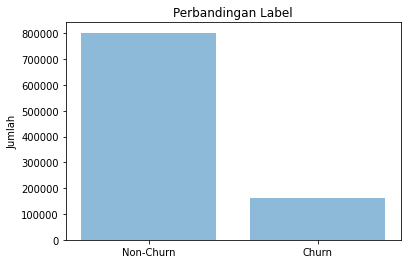

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
objects = ('Non-Churn', 'Churn')
y_pos = np.arange(len(objects))
performance = data['Label'].value_counts()
#Label Comparing
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Jumlah')
plt.title('Perbandingan Label')
plt.savefig("/content/drive/MyDrive/hasil.png")
plt.show()

In [ ]:
from sklearn.utils import resample
#Implement UnderSampling 
maj_class1 = resample(df_majority1,
                      replace=True,
                      n_samples=160000,
                      random_state=1)
mn_class1 = resample(df_minority1,
                      replace=True,
                      n_samples=160000,
                      random_state=1)

In [ ]:
data= pd.concat([maj_class1,mn_class1])

In [ ]:
data['Label'].value_counts()

Churn    160000
Loyal    160000
Name: Label, dtype: int64

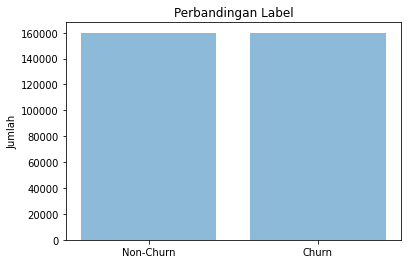

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
objects = ('Non-Churn', 'Churn')
y_pos = np.arange(len(objects))
performance = data['Label'].value_counts()
#Visualize after Undersampling
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Jumlah')
plt.title('Perbandingan Label')
plt.savefig("/content/drive/MyDrive/hasill.png")
plt.show()

In [ ]:
data

,Unnamed: 0,Unnamed: 0.1,msisdn,imsi,tc_day1,tc_day2,tc_day3,tc_day4,tc_day5,tc_day6,tc_day7,tc_day8,tc_day9,tc_day10,tc_day11,tc_day12,tc_day13,tc_day14,tc_day15,tc_day16,tc_day17,tc_day18,tc_day19,tc_day20,tc_day21,tc_day22,tc_day23,tc_day24,tc_day25,tc_day26,tc_day27,tc_day28,tc_day29,tc_day30,tc_day31,R,F,M,r_bin,f_bin,m_bin,Score,Label
153871,153871,154808,6281X15X0X0XX,5101015397851XX,143316.0,13133799.0,0.0,31653734.0,167282.0,573392.0,20945.0,5.814294e+07,295728.0,0.0,4813166.0,2241069.0,166585.0,7.0,12764111.0,97145085.0,0.0,91602.0,1043644.0,1079954.0,3900.0,596936.0,734175.0,57883.0,177321.0,6633967.0,1930.0,16907.0,6302010.0,583180040.0,106383.0,31,22,102660.976125,10.0,7.0,1.0,18.0,Loyal
590938,590938,605072,62812196081XX,X1010192X6081XX,1820138.0,48733.0,0.0,18047.0,646299.0,0.0,12370975.0,1.016869e+06,135393.0,705459.0,1.0,604001.0,143964.0,7309633.0,0.0,772209.0,546055.0,0.0,22236.0,4104234.0,112.0,23618.0,342516.0,13108698.0,568216293.0,0.0,741569.0,12938710.0,1081568.0,9049.0,43885.0,29,18,78346.283000,9.0,6.0,1.0,16.0,Loyal
566231,566231,579140,6X81X88X63XXX,5101088X5X63XXX,26470.0,2176842.0,7035.0,31769.0,5015532.0,130940.0,0.0,1.197123e+09,501217.0,2480037.0,28404.0,9274200.0,0.0,442.0,337487.0,0.0,16700341.0,130945.0,1201.0,3554459.0,2371680.0,426419.0,244419021.0,6370.0,6254.0,1353766.0,0.0,404301.0,149.0,1678937.0,5624191.0,31,18,186726.401000,10.0,6.0,2.0,18.0,Loyal
950691,950691,985972,XX813944X59XX,5101094X94X1XXX,69097.0,68987206.0,27193.0,290214684.0,81239.0,732.0,4183252.0,6.919640e+05,542836.0,1346705.0,110193.0,399273.0,0.0,2161001.0,0.0,284921.0,1216465.0,1087465.0,0.0,8915826.0,0.0,551470.0,77.0,46655414.0,0.0,2788.0,0.0,32.0,0.0,110326.0,11641213.0,31,18,54910.171500,10.0,6.0,1.0,17.0,Loyal
590338,590338,604448,X282111X195XX,5101011X2X195XX,62438.0,525884.0,0.0,7768249.0,6702967.0,11697943.0,315240207.0,1.985951e+08,313116780.0,8557.0,5004.0,57612.0,72193835.0,167613077.0,137948.0,0.0,23301411.0,101.0,2788579.0,0.0,20704383.0,41717.0,7196533.0,445607286.0,1897953.0,12527.0,2020016.0,1891416.0,9664.0,26368.0,1388169.0,31,19,200076.461000,10.0,6.0,2.0,18.0,Loyal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
702598,702598,722242,628131529X3XX,51010153229X3XX,36265839.0,145833.0,49511.0,0.0,0.0,852385.0,2530970.0,0.000000e+00,667.0,0.0,14687098.0,59479.0,493981.0,1744753.0,770774.0,0.0,12645417.0,0.0,3204.0,232191.0,5294.0,88542.0,597352.0,77340.0,174717.0,9.0,0.0,32837.0,47360.0,448069574.0,9403010.0,31,15,66122.267125,10.0,4.0,1.0,15.0,Churn
946006,946006,980984,628X285000XX,5X0X085220000XX,50939.0,0.0,0.0,64357230.0,68.0,71775.0,0.0,6.770194e+07,53067.0,54.0,0.0,1034836.0,0.0,1991033.0,1082.0,20532323.0,36852447.0,0.0,2156145.0,37.0,82914883.0,10816.0,377300.0,3038208.0,43890.0,11217264.0,254481942.0,328529844.0,2851.0,941695.0,139794.0,31,15,109562.682625,10.0,4.0,1.0,15.0,Churn
300544,300544,304216,X28129737X3XX,51X1X972537X3XX,154657.0,77404.0,0.0,3718471.0,0.0,34563.0,314699.0,3.163400e+04,78081.0,1222114.0,0.0,1846468.0,136569.0,324573.0,172194.0,1089722.0,0.0,0.0,0.0,35914.0,12808.0,1474.0,174262.0,0.0,394.0,25956.0,0.0,648266.0,102900.0,3952.0,119584.0,31,13,1290.832375,10.0,4.0,1.0,15.0,Churn
564424,564424,577255,6X8X1144X43XX,X1010146X4X43XX,47191423.0,809246.0,2223877.0,14488654.0,0.0,0.0,0.0,5.360800e+04,0.0,201995813.0,0.0,239301.0,871.0,4258.0,0.0,555896.0,27117.0,5662.0,1168892.0,4390992.0,0.0,40.0,431271.0,2940928.0,3242586.0,0.0,247921132.0,49911.0,36817708.0,753557.0,12467.0,30,15,70665.651250,10.0,4.0,1.0,15.0,Churn


In [ ]:
Dataset = data.drop(columns=['Unnamed: 0','Unnamed: 0.1','msisdn','imsi','R','F','M','r_bin','f_bin','m_bin','Score']) #Data Selection

In [ ]:
Dataset

,tc_day1,tc_day2,tc_day3,tc_day4,tc_day5,tc_day6,tc_day7,tc_day8,tc_day9,tc_day10,tc_day11,tc_day12,tc_day13,tc_day14,tc_day15,tc_day16,tc_day17,tc_day18,tc_day19,tc_day20,tc_day21,tc_day22,tc_day23,tc_day24,tc_day25,tc_day26,tc_day27,tc_day28,tc_day29,tc_day30,tc_day31,Label
153871,143316.0,13133799.0,0.0,31653734.0,167282.0,573392.0,20945.0,5.814294e+07,295728.0,0.0,4813166.0,2241069.0,166585.0,7.0,12764111.0,97145085.0,0.0,91602.0,1043644.0,1079954.0,3900.0,596936.0,734175.0,57883.0,177321.0,6633967.0,1930.0,16907.0,6302010.0,583180040.0,106383.0,Loyal
590938,1820138.0,48733.0,0.0,18047.0,646299.0,0.0,12370975.0,1.016869e+06,135393.0,705459.0,1.0,604001.0,143964.0,7309633.0,0.0,772209.0,546055.0,0.0,22236.0,4104234.0,112.0,23618.0,342516.0,13108698.0,568216293.0,0.0,741569.0,12938710.0,1081568.0,9049.0,43885.0,Loyal
566231,26470.0,2176842.0,7035.0,31769.0,5015532.0,130940.0,0.0,1.197123e+09,501217.0,2480037.0,28404.0,9274200.0,0.0,442.0,337487.0,0.0,16700341.0,130945.0,1201.0,3554459.0,2371680.0,426419.0,244419021.0,6370.0,6254.0,1353766.0,0.0,404301.0,149.0,1678937.0,5624191.0,Loyal
950691,69097.0,68987206.0,27193.0,290214684.0,81239.0,732.0,4183252.0,6.919640e+05,542836.0,1346705.0,110193.0,399273.0,0.0,2161001.0,0.0,284921.0,1216465.0,1087465.0,0.0,8915826.0,0.0,551470.0,77.0,46655414.0,0.0,2788.0,0.0,32.0,0.0,110326.0,11641213.0,Loyal
590338,62438.0,525884.0,0.0,7768249.0,6702967.0,11697943.0,315240207.0,1.985951e+08,313116780.0,8557.0,5004.0,57612.0,72193835.0,167613077.0,137948.0,0.0,23301411.0,101.0,2788579.0,0.0,20704383.0,41717.0,7196533.0,445607286.0,1897953.0,12527.0,2020016.0,1891416.0,9664.0,26368.0,1388169.0,Loyal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
702598,36265839.0,145833.0,49511.0,0.0,0.0,852385.0,2530970.0,0.000000e+00,667.0,0.0,14687098.0,59479.0,493981.0,1744753.0,770774.0,0.0,12645417.0,0.0,3204.0,232191.0,5294.0,88542.0,597352.0,77340.0,174717.0,9.0,0.0,32837.0,47360.0,448069574.0,9403010.0,Churn
946006,50939.0,0.0,0.0,64357230.0,68.0,71775.0,0.0,6.770194e+07,53067.0,54.0,0.0,1034836.0,0.0,1991033.0,1082.0,20532323.0,36852447.0,0.0,2156145.0,37.0,82914883.0,10816.0,377300.0,3038208.0,43890.0,11217264.0,254481942.0,328529844.0,2851.0,941695.0,139794.0,Churn
300544,154657.0,77404.0,0.0,3718471.0,0.0,34563.0,314699.0,3.163400e+04,78081.0,1222114.0,0.0,1846468.0,136569.0,324573.0,172194.0,1089722.0,0.0,0.0,0.0,35914.0,12808.0,1474.0,174262.0,0.0,394.0,25956.0,0.0,648266.0,102900.0,3952.0,119584.0,Churn
564424,47191423.0,809246.0,2223877.0,14488654.0,0.0,0.0,0.0,5.360800e+04,0.0,201995813.0,0.0,239301.0,871.0,4258.0,0.0,555896.0,27117.0,5662.0,1168892.0,4390992.0,0.0,40.0,431271.0,2940928.0,3242586.0,0.0,247921132.0,49911.0,36817708.0,753557.0,12467.0,Churn


In [ ]:
Dataset['Label']=(Dataset['Label']== 'Loyal').astype(int) #Encode Label to Boolean

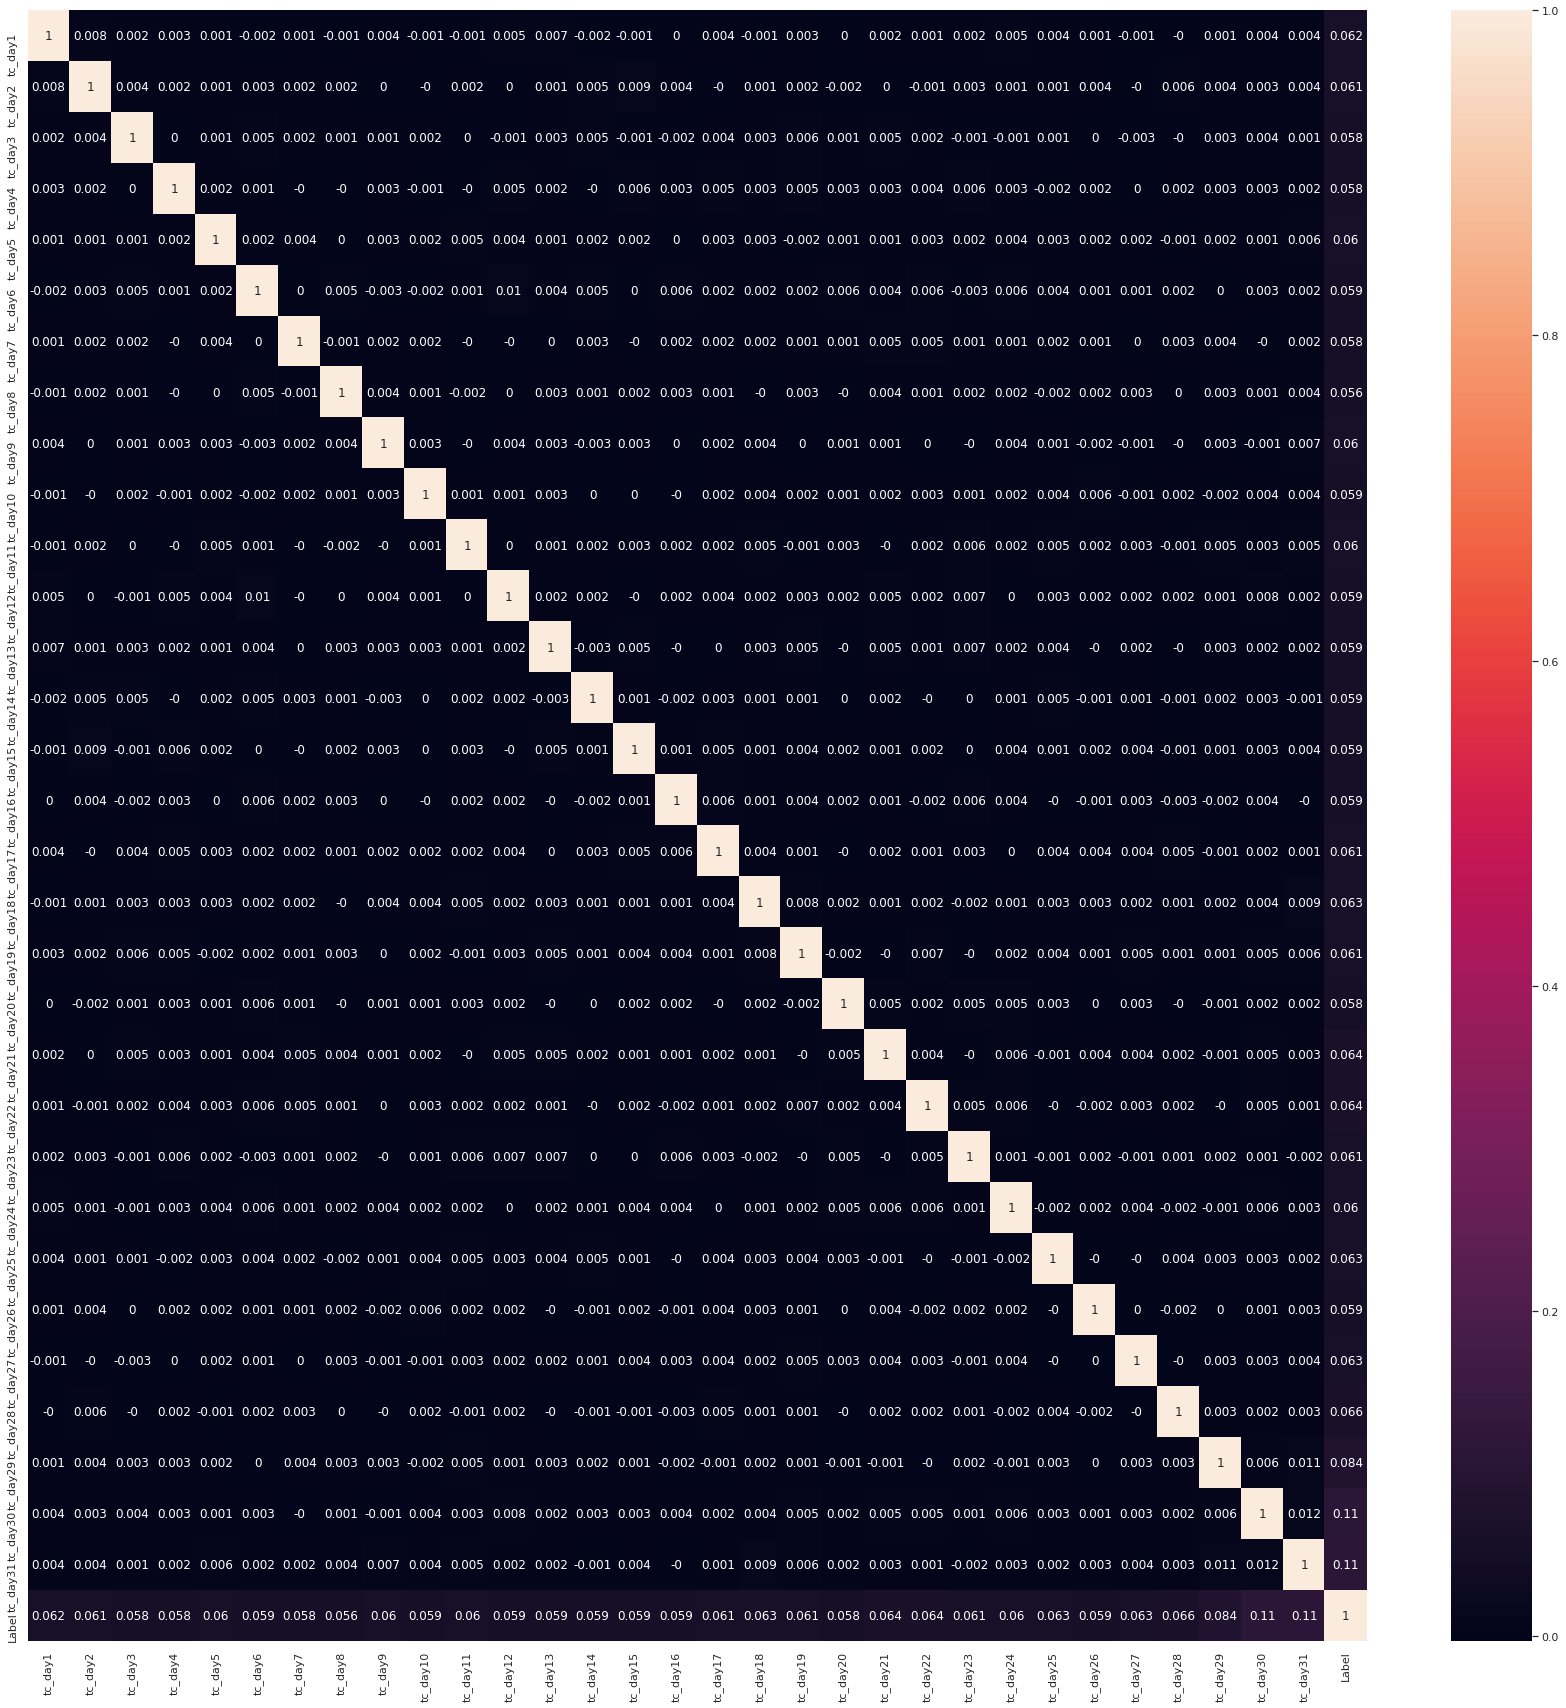

In [ ]:
%matplotlib inline
sns.set(rc={'figure.figsize':(30,30)})
correlation_matrix = Dataset.corr().round(3)
sns.heatmap(data=correlation_matrix, annot=True, )
plt.show() #Correlation Matrix Vizualization

In [ ]:
Dataset

,tc_day1,tc_day2,tc_day3,tc_day4,tc_day5,tc_day6,tc_day7,tc_day8,tc_day9,tc_day10,tc_day11,tc_day12,tc_day13,tc_day14,tc_day15,tc_day16,tc_day17,tc_day18,tc_day19,tc_day20,tc_day21,tc_day22,tc_day23,tc_day24,tc_day25,tc_day26,tc_day27,tc_day28,tc_day29,tc_day30,tc_day31,Label
153871,143316.0,13133799.0,0.0,31653734.0,167282.0,573392.0,20945.0,5.814294e+07,295728.0,0.0,4813166.0,2241069.0,166585.0,7.0,12764111.0,97145085.0,0.0,91602.0,1043644.0,1079954.0,3900.0,596936.0,734175.0,57883.0,177321.0,6633967.0,1930.0,16907.0,6302010.0,583180040.0,106383.0,1
590938,1820138.0,48733.0,0.0,18047.0,646299.0,0.0,12370975.0,1.016869e+06,135393.0,705459.0,1.0,604001.0,143964.0,7309633.0,0.0,772209.0,546055.0,0.0,22236.0,4104234.0,112.0,23618.0,342516.0,13108698.0,568216293.0,0.0,741569.0,12938710.0,1081568.0,9049.0,43885.0,1
566231,26470.0,2176842.0,7035.0,31769.0,5015532.0,130940.0,0.0,1.197123e+09,501217.0,2480037.0,28404.0,9274200.0,0.0,442.0,337487.0,0.0,16700341.0,130945.0,1201.0,3554459.0,2371680.0,426419.0,244419021.0,6370.0,6254.0,1353766.0,0.0,404301.0,149.0,1678937.0,5624191.0,1
950691,69097.0,68987206.0,27193.0,290214684.0,81239.0,732.0,4183252.0,6.919640e+05,542836.0,1346705.0,110193.0,399273.0,0.0,2161001.0,0.0,284921.0,1216465.0,1087465.0,0.0,8915826.0,0.0,551470.0,77.0,46655414.0,0.0,2788.0,0.0,32.0,0.0,110326.0,11641213.0,1
590338,62438.0,525884.0,0.0,7768249.0,6702967.0,11697943.0,315240207.0,1.985951e+08,313116780.0,8557.0,5004.0,57612.0,72193835.0,167613077.0,137948.0,0.0,23301411.0,101.0,2788579.0,0.0,20704383.0,41717.0,7196533.0,445607286.0,1897953.0,12527.0,2020016.0,1891416.0,9664.0,26368.0,1388169.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
702598,36265839.0,145833.0,49511.0,0.0,0.0,852385.0,2530970.0,0.000000e+00,667.0,0.0,14687098.0,59479.0,493981.0,1744753.0,770774.0,0.0,12645417.0,0.0,3204.0,232191.0,5294.0,88542.0,597352.0,77340.0,174717.0,9.0,0.0,32837.0,47360.0,448069574.0,9403010.0,0
946006,50939.0,0.0,0.0,64357230.0,68.0,71775.0,0.0,6.770194e+07,53067.0,54.0,0.0,1034836.0,0.0,1991033.0,1082.0,20532323.0,36852447.0,0.0,2156145.0,37.0,82914883.0,10816.0,377300.0,3038208.0,43890.0,11217264.0,254481942.0,328529844.0,2851.0,941695.0,139794.0,0
300544,154657.0,77404.0,0.0,3718471.0,0.0,34563.0,314699.0,3.163400e+04,78081.0,1222114.0,0.0,1846468.0,136569.0,324573.0,172194.0,1089722.0,0.0,0.0,0.0,35914.0,12808.0,1474.0,174262.0,0.0,394.0,25956.0,0.0,648266.0,102900.0,3952.0,119584.0,0
564424,47191423.0,809246.0,2223877.0,14488654.0,0.0,0.0,0.0,5.360800e+04,0.0,201995813.0,0.0,239301.0,871.0,4258.0,0.0,555896.0,27117.0,5662.0,1168892.0,4390992.0,0.0,40.0,431271.0,2940928.0,3242586.0,0.0,247921132.0,49911.0,36817708.0,753557.0,12467.0,0


In [ ]:
Dataset['Label'].value_counts()

1    160000
0    160000
Name: Label, dtype: int64

In [ ]:
Dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 320000 entries, 153871 to 347879
Data columns (total 32 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   tc_day1   320000 non-null  float64
 1   tc_day2   320000 non-null  float64
 2   tc_day3   320000 non-null  float64
 3   tc_day4   320000 non-null  float64
 4   tc_day5   320000 non-null  float64
 5   tc_day6   320000 non-null  float64
 6   tc_day7   320000 non-null  float64
 7   tc_day8   320000 non-null  float64
 8   tc_day9   320000 non-null  float64
 9   tc_day10  320000 non-null  float64
 10  tc_day11  320000 non-null  float64
 11  tc_day12  320000 non-null  float64
 12  tc_day13  320000 non-null  float64
 13  tc_day14  320000 non-null  float64
 14  tc_day15  320000 non-null  float64
 15  tc_day16  320000 non-null  float64
 16  tc_day17  320000 non-null  float64
 17  tc_day18  320000 non-null  float64
 18  tc_day19  320000 non-null  float64
 19  tc_day20  320000 non-null  float64
 20 

In [ ]:
#Set Data Attrubute and Target
x = Dataset.iloc[:,:31].values
y = Dataset['Label'].values

In [ ]:
x

array([[1.4331600e+05, 1.3133799e+07, 0.0000000e+00, ..., 6.3020100e+06,
        5.8318004e+08, 1.0638300e+05],
       [1.8201380e+06, 4.8733000e+04, 0.0000000e+00, ..., 1.0815680e+06,
        9.0490000e+03, 4.3885000e+04],
       [2.6470000e+04, 2.1768420e+06, 7.0350000e+03, ..., 1.4900000e+02,
        1.6789370e+06, 5.6241910e+06],
       ...,
       [1.5465700e+05, 7.7404000e+04, 0.0000000e+00, ..., 1.0290000e+05,
        3.9520000e+03, 1.1958400e+05],
       [4.7191423e+07, 8.0924600e+05, 2.2238770e+06, ..., 3.6817708e+07,
        7.5355700e+05, 1.2467000e+04],
       [7.2924666e+07, 3.4387860e+06, 2.3837931e+07, ..., 2.3378000e+04,
        4.5628100e+05, 3.1715780e+06]])

In [ ]:
y

array([1, 1, 1, ..., 0, 0, 0])

Naive Bayes Implementation

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler

In [ ]:
#Scaling Data
mms = MinMaxScaler()
xscaler = mms.fit_transform(x)

In [ ]:
xtrain,xtest,ytrain,ytest = train_test_split(xscaler,y, test_size = 0.3) #Split Dataset

In [ ]:
xtrain.shape,xtest.shape,ytrain.shape,ytest.shape

((224000, 31), (96000, 31), (224000,), (96000,))

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import QuantileTransformer
#Create Pipeline
pipeline = make_pipeline(QuantileTransformer(output_distribution='uniform'), GaussianNB())

In [ ]:
model = pipeline.fit(xtrain,ytrain) #Train Model
model

Pipeline(memory=None,
         steps=[('quantiletransformer',
                 QuantileTransformer(copy=True, ignore_implicit_zeros=False,
                                     n_quantiles=1000,
                                     output_distribution='uniform',
                                     random_state=None, subsample=100000)),
                ('gaussiannb', GaussianNB(priors=None, var_smoothing=1e-09))],
         verbose=False)

In [ ]:
ypred = model.predict(xtest) #Test Predict

In [ ]:
from sklearn.metrics import accuracy_score
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(ytest, ypred))) #Accuracy

Model accuracy score: 0.8291


Evaluate Model

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(ytest, ypred)
#calculation tp,tn,fp,fn
print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[1,1])

print('\nTrue Negatives(TN) = ', cm[0,0])

print('\nFalse Positives(FP) = ', cm[1,0])

print('\nFalse Negatives(FN) = ', cm[0,1])

Confusion matrix

 [[40961  6866]
 [ 9540 38633]]

True Positives(TP) =  38633

True Negatives(TN) =  40961

False Positives(FP) =  9540

False Negatives(FN) =  6866


In [ ]:
tn, fp, fn, tp = confusion_matrix(ytest, ypred).ravel()

In [ ]:
print(cm)

[[40961  6866]
 [ 9540 38633]]


In [ ]:
#Confusion Matrix
print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', tp)

print('\nTrue Negatives(TN) = ', tn)

print('\nFalse Positives(FP) = ', fp)

print('\nFalse Negatives(FN) = ', fn)

Confusion matrix

 [[40961  6866]
 [ 9540 38633]]

True Positives(TP) =  38633

True Negatives(TN) =  40961

False Positives(FP) =  6866

False Negatives(FN) =  9540


In [ ]:
print(tn)

40961


In [ ]:
precision_tp = tp / (tp+fp) #Precision calculation

In [ ]:
print(precision_tp)

0.8490955845183411


In [ ]:
recall_tp = tp / (tp+fn) #Recall Calculation

In [ ]:
print(recall_tp)

0.8019637556307475


In [ ]:

from sklearn.metrics import roc_auc_score
from sklearn.model_selection import KFold
ROC_AUC = roc_auc_score(ytest, ypred)

print('ROC AUC : {:.4f}'.format(ROC_AUC)) #ROC Score

ROC AUC : 0.8292


In [ ]:
#K-Fold Cross Validation
from sklearn.model_selection import cross_val_score
cv = KFold(n_splits=10, random_state=1, shuffle=True)
Score = cross_val_score(model, x, y, cv=cv, scoring='f1')

In [ ]:
Score

array([0.82594401, 0.82369598, 0.82604377, 0.82650471, 0.82469904,
       0.82778276, 0.82454674, 0.82485474, 0.82376864, 0.82261912])

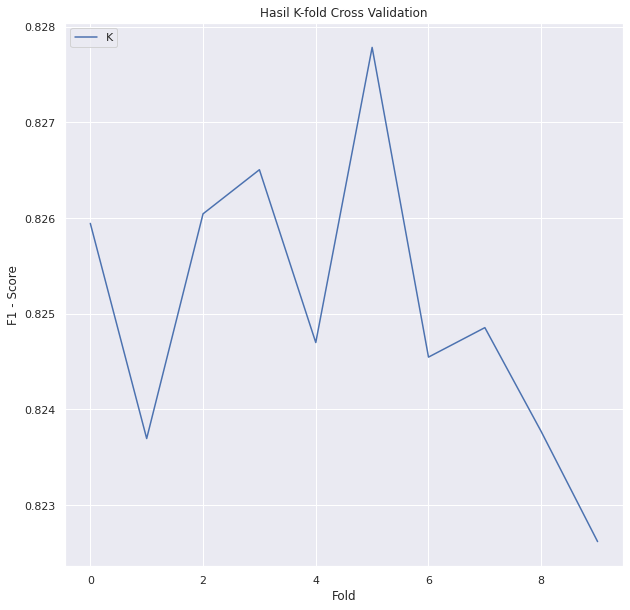

In [ ]:
    #Visualize K-Fold
    import matplotlib.pyplot as plt
    plt.figure(figsize=[10,10])
    plt.plot(Score)
    plt.title('Hasil K-fold Cross Validation')
    plt.ylabel('F1 - Score')
    plt.xlabel('Fold')
    plt.legend('K-n', loc='upper left')
    plt.savefig("/content/drive/MyDrive/k-fold.png")
    plt.show()

In [ ]:
mean_score = Score.mean() #Average K-n Score

In [ ]:
print('Kfold Cross validated Score : {:.4f}'.format(mean_score))

Kfold Cross validated Score : 0.8250


In [ ]:
from sklearn.metrics import f1_score
f1_score(ytest, ypred, average='binary')

0.8248569476471092

In [ ]:
precision_tn = tn /(tn+fn)

In [ ]:
print(precision_tn)

0.8110928496465416


In [ ]:
recall_tn = tn /(tn+fp)

In [ ]:
print(tp)

38633


In [ ]:
print(recall_tn)

0.8564409224914797


In [ ]:
F_tp = 2 * (precision_tp * recall_tp) / (precision_tp + recall_tp)
print(F_tp)

0.8248569476471092


In [ ]:
F_tn = 2 * (precision_tn * recall_tn) / (precision_tn + recall_tn)
print(F_tn)

0.8331502725571557


In [ ]:
print(fn)

9540


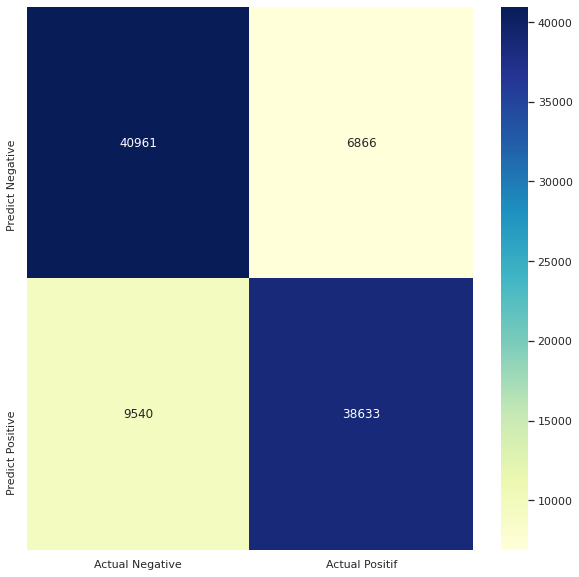

In [ ]:
#Visualize Confusion Matrix
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Negative', 'Actual Positif'], 
                                 index=['Predict Negative', 'Predict Positive'])
sns.set(rc={'figure.figsize':(10,10)})
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')